In [47]:
import xarray as xr
import pandas as pd
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [49]:
cd /Users/usmanc18/Desktop/FETCH/

/Users/usmanc18/Desktop/FETCH


In [51]:
aza = nc.Dataset('aza.nc')

In [53]:
aza

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): response(5), time(27)
    variables(dimensions): int64 response(response), int64 time(time), float64 transfer_sensor_pressure(response, time), float64 transfer_sensor_temperature(response, time), float64 ambient_sensor_pressure(response, time), float64 ambient_sensor_temperature(response, time), float64 low_pressure_sensor_pressure(response, time), float64 low_pressure_sensor_temperature(response, time), int64 response_timestamp(response, time)
    groups: 

In [55]:
dat=xr.open_dataset('aza.nc')

In [57]:
times = dat.coords['time'].values
response = dat.coords['response'].values
tsprs = dat['transfer_sensor_pressure'].values
ts_temp = dat['transfer_sensor_temperature'].values
asp_pressure = dat['ambient_sensor_pressure'].values
asp_temperature = dat['ambient_sensor_temperature'].values
lps_pressure = dat['low_pressure_sensor_pressure'].values
lps_temperature = dat['low_pressure_sensor_temperature'].values
resp_ts = dat['response_timestamp'].values


In [59]:
times

array(['2022-09-01T20:41:56.000000000', '2022-09-04T01:25:13.000000000',
       '2022-09-14T19:04:54.000000000', '2022-09-18T22:36:52.000000000',
       '2022-09-29T21:22:51.000000000', '2022-10-07T01:22:35.000000000',
       '2022-10-15T15:45:53.000000000', '2022-11-07T08:38:36.000000000',
       '2022-11-22T05:16:54.000000000', '2022-12-10T01:15:28.000000000',
       '2022-12-31T10:49:39.000000000', '2023-01-26T03:06:10.000000000',
       '2023-02-23T03:06:30.000000000', '2023-04-20T03:06:10.000000000',
       '2023-05-18T03:06:10.000000000', '2023-06-15T03:06:10.000000000',
       '2023-07-13T03:06:10.000000000', '2023-08-10T03:06:10.000000000',
       '2023-09-07T03:06:10.000000000', '2023-10-05T03:06:10.000000000',
       '2023-12-28T03:06:10.000000000', '2024-01-25T03:06:10.000000000',
       '2024-02-22T03:06:10.000000000', '2024-03-21T03:06:10.000000000',
       '2024-04-18T03:06:10.000000000', '2024-06-13T03:06:17.000000000',
       '2024-07-11T03:06:16.000000000'], dtype='dat

In [61]:
import pandas as pd
import numpy as np
# Create the MultiIndex



data = xr.Dataset(
    {
        "transfer_sensor_pressure": (["response", "time"], tsprs),
        "transfer_sensor_temperature": (["response", "time"], ts_temp),
        "ambient_sensor_pressure": (["response", "time"], asp_pressure),
        "ambient_sensor_temperature": (["response", "time"], asp_temperature),
        "low_pressure_sensor_pressure": (["response", "time"], lps_pressure),
        "low_pressure_sensor_temperature": (["response", "time"], lps_temperature),
        "response_timestamp": (["response", "time"], resp_ts)
    },
    coords={
        "time": times,
        "response": response
    }
)
df = data.to_dataframe().reset_index()

In [63]:
df[df['time']== '2022-09-01 20:41:56']

,response,time,transfer_sensor_pressure,transfer_sensor_temperature,ambient_sensor_pressure,ambient_sensor_temperature,low_pressure_sensor_pressure,low_pressure_sensor_temperature,response_timestamp
0,1,2022-09-01 20:41:56,15529.5391,2.9538,15523.4658,3.2451,93.655,-9999.0,2022-09-01 20:42:03
27,2,2022-09-01 20:41:56,15529.4854,2.9618,15523.4902,3.2472,93.476,-9999.0,2022-09-01 20:42:35
54,3,2022-09-01 20:41:56,90.2608,2.9881,15523.9160,3.3401,90.202,-9999.0,2022-09-01 20:46:45
81,4,2022-09-01 20:41:56,15529.6426,3.0142,15524.0439,3.4092,92.341,-9999.0,2022-09-01 20:50:07
108,5,2022-09-01 20:41:56,15530.3936,3.0153,15524.1064,3.4127,92.325,-9999.0,2022-09-01 20:50:18


In [65]:
df[df['time']>'2022-09-04 01:25:13']

,response,time,transfer_sensor_pressure,transfer_sensor_temperature,ambient_sensor_pressure,ambient_sensor_temperature,low_pressure_sensor_pressure,low_pressure_sensor_temperature,response_timestamp
2,1,2022-09-14 19:04:54,15525.1201,2.8437,15519.1689,2.8830,90.655,-9999.0,2022-09-14 19:05:15
3,1,2022-09-18 22:36:52,15528.9463,2.8782,15522.8877,2.9162,92.369,-9999.0,2022-09-18 22:37:13
4,1,2022-09-29 21:22:51,15537.5078,2.8775,15531.4893,2.9148,90.778,-9999.0,2022-09-29 21:23:13
5,1,2022-10-07 01:22:35,15522.9092,2.8509,15516.8936,2.8853,91.995,-9999.0,2022-10-07 01:22:56
6,1,2022-10-15 15:45:53,15526.5918,2.8678,15520.6035,2.9011,91.886,-9999.0,2022-10-15 15:46:15
...,...,...,...,...,...,...,...,...,...
130,5,2024-02-22 03:06:10,15515.1260,2.8883,15509.0684,3.1741,99.324,-9999.0,2024-02-22 03:18:27
131,5,2024-03-21 03:06:10,15522.0713,2.9505,15516.0410,3.2373,99.992,-9999.0,2024-03-21 03:15:44
132,5,2024-04-18 03:06:10,15528.5605,2.9656,15521.8184,3.3138,100.398,-9999.0,2024-04-18 03:15:44
133,5,2024-06-13 03:06:17,15530.5752,2.9531,15523.5967,3.3170,100.338,-9999.0,2024-06-13 03:15:50


In [67]:
df['time'][1:38]

1    2022-09-04 01:25:13
2    2022-09-14 19:04:54
3    2022-09-18 22:36:52
4    2022-09-29 21:22:51
5    2022-10-07 01:22:35
6    2022-10-15 15:45:53
7    2022-11-07 08:38:36
8    2022-11-22 05:16:54
9    2022-12-10 01:15:28
10   2022-12-31 10:49:39
11   2023-01-26 03:06:10
12   2023-02-23 03:06:30
13   2023-04-20 03:06:10
14   2023-05-18 03:06:10
15   2023-06-15 03:06:10
16   2023-07-13 03:06:10
17   2023-08-10 03:06:10
18   2023-09-07 03:06:10
19   2023-10-05 03:06:10
20   2023-12-28 03:06:10
21   2024-01-25 03:06:10
22   2024-02-22 03:06:10
23   2024-03-21 03:06:10
24   2024-04-18 03:06:10
25   2024-06-13 03:06:17
26   2024-07-11 03:06:16
27   2022-09-01 20:41:56
28   2022-09-04 01:25:13
29   2022-09-14 19:04:54
30   2022-09-18 22:36:52
31   2022-09-29 21:22:51
32   2022-10-07 01:22:35
33   2022-10-15 15:45:53
34   2022-11-07 08:38:36
35   2022-11-22 05:16:54
36   2022-12-10 01:15:28
37   2022-12-31 10:49:39
Name: time, dtype: datetime64[ns]

In [69]:
df[df['time']=='2022-09-04 01:25:03']

,response,time,transfer_sensor_pressure,transfer_sensor_temperature,ambient_sensor_pressure,ambient_sensor_temperature,low_pressure_sensor_pressure,low_pressure_sensor_temperature,response_timestamp


In [71]:
df[df['time']=='2022-09-04 01:25:08']

,response,time,transfer_sensor_pressure,transfer_sensor_temperature,ambient_sensor_pressure,ambient_sensor_temperature,low_pressure_sensor_pressure,low_pressure_sensor_temperature,response_timestamp


In [73]:
df[df['time']=='2022-09-04 01:25:13']

,response,time,transfer_sensor_pressure,transfer_sensor_temperature,ambient_sensor_pressure,ambient_sensor_temperature,low_pressure_sensor_pressure,low_pressure_sensor_temperature,response_timestamp
1,1,2022-09-04 01:25:13,15536.1865,2.8843,15530.2559,2.9296,88.936,-9999.0,2022-09-04 01:25:34
28,2,2022-09-04 01:25:13,15536.0117,2.8950,15530.2793,2.9481,88.937,-9999.0,2022-09-04 01:26:08
55,3,2022-09-04 01:25:13,92.1366,2.9461,15530.1504,3.1769,92.278,-9999.0,2022-09-04 01:31:58
82,4,2022-09-04 01:25:13,15535.4707,2.9835,15530.1074,3.3045,94.248,-9999.0,2022-09-04 01:36:54
109,5,2022-09-04 01:25:13,15535.7187,2.9844,15530.1377,3.3087,94.239,-9999.0,2022-09-04 01:37:05


In [75]:
df[df['time']=='2022-09-14 19:04:54']

,response,time,transfer_sensor_pressure,transfer_sensor_temperature,ambient_sensor_pressure,ambient_sensor_temperature,low_pressure_sensor_pressure,low_pressure_sensor_temperature,response_timestamp
2,1,2022-09-14 19:04:54,15525.1201,2.8437,15519.1689,2.8830,90.655,-9999.0,2022-09-14 19:05:15
29,2,2022-09-14 19:04:54,15524.9971,2.8549,15519.1406,2.8977,90.656,-9999.0,2022-09-14 19:05:48
56,3,2022-09-14 19:04:54,91.4333,2.9040,15519.6465,3.1142,91.593,-9999.0,2022-09-14 19:11:13
83,4,2022-09-14 19:04:54,15525.3672,2.9418,15520.0234,3.2486,93.987,-9999.0,2022-09-14 19:16:09
110,5,2022-09-14 19:04:54,15525.8301,2.9433,15520.0176,3.2532,93.982,-9999.0,2022-09-14 19:16:21


In [77]:
df[df['time']=='2022-11-22 05:16:54']

,response,time,transfer_sensor_pressure,transfer_sensor_temperature,ambient_sensor_pressure,ambient_sensor_temperature,low_pressure_sensor_pressure,low_pressure_sensor_temperature,response_timestamp
8,1,2022-11-22 05:16:54,15528.6045,2.8809,15522.4639,2.9156,89.745,-9999.0,2022-11-22 05:17:16
35,2,2022-11-22 05:16:54,15528.5049,2.8919,15522.4629,2.9317,89.747,-9999.0,2022-11-22 05:17:48
62,3,2022-11-22 05:16:54,90.7127,2.9402,15522.9785,3.1487,90.905,-9999.0,2022-11-22 05:23:12
89,4,2022-11-22 05:16:54,15528.7354,2.9787,15523.1611,3.2829,93.644,-9999.0,2022-11-22 05:28:08
116,5,2022-11-22 05:16:54,15529.3633,2.9797,15523.2012,3.2872,93.636,-9999.0,2022-11-22 05:28:19


In [79]:
df[df['time']=='2022-10-07 01:22:25']

,response,time,transfer_sensor_pressure,transfer_sensor_temperature,ambient_sensor_pressure,ambient_sensor_temperature,low_pressure_sensor_pressure,low_pressure_sensor_temperature,response_timestamp


In [81]:
df[df['time']=='2022-10-07 01:22:30']

,response,time,transfer_sensor_pressure,transfer_sensor_temperature,ambient_sensor_pressure,ambient_sensor_temperature,low_pressure_sensor_pressure,low_pressure_sensor_temperature,response_timestamp


In [83]:
a1=df[df['response']==1]['ambient_sensor_pressure'].values
a2=df[df['response']==2]['ambient_sensor_pressure'].values
a3=df[df['response']==3]['ambient_sensor_pressure'].values
a4=df[df['response']==4]['ambient_sensor_pressure'].values
a5=df[df['response']==5]['ambient_sensor_pressure'].values
t1=df[df['response']==1]['transfer_sensor_pressure'].values
t2=df[df['response']==2]['transfer_sensor_pressure'].values
t3=df[df['response']==3]['transfer_sensor_pressure'].values
t4=df[df['response']==4]['transfer_sensor_pressure'].values
t5=df[df['response']==5]['transfer_sensor_pressure'].values
l1=df[df['response']==1]['low_pressure_sensor_pressure'].values
l2=df[df['response']==2]['low_pressure_sensor_pressure'].values
l3=df[df['response']==3]['low_pressure_sensor_pressure'].values
l4=df[df['response']==4]['low_pressure_sensor_pressure'].values
l5=df[df['response']==5]['low_pressure_sensor_pressure'].values

tm=df[df['response']==1]['time'].values


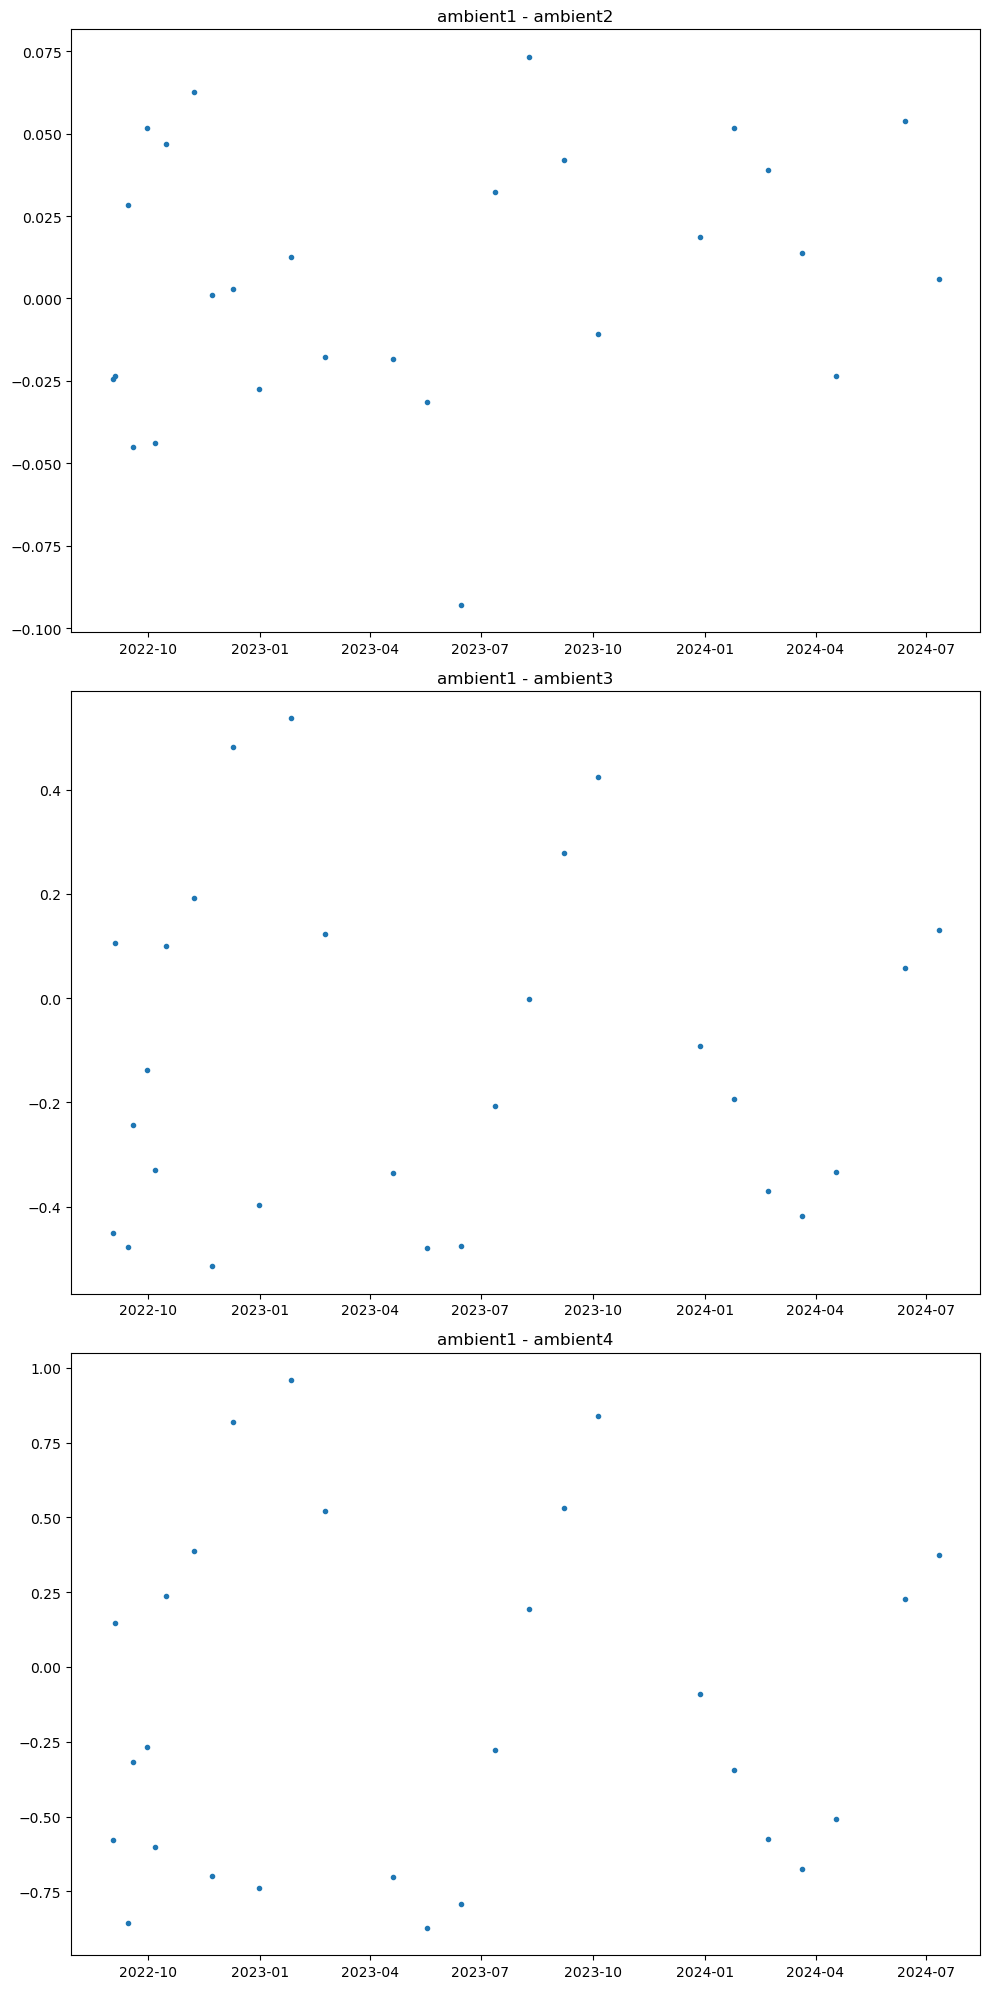

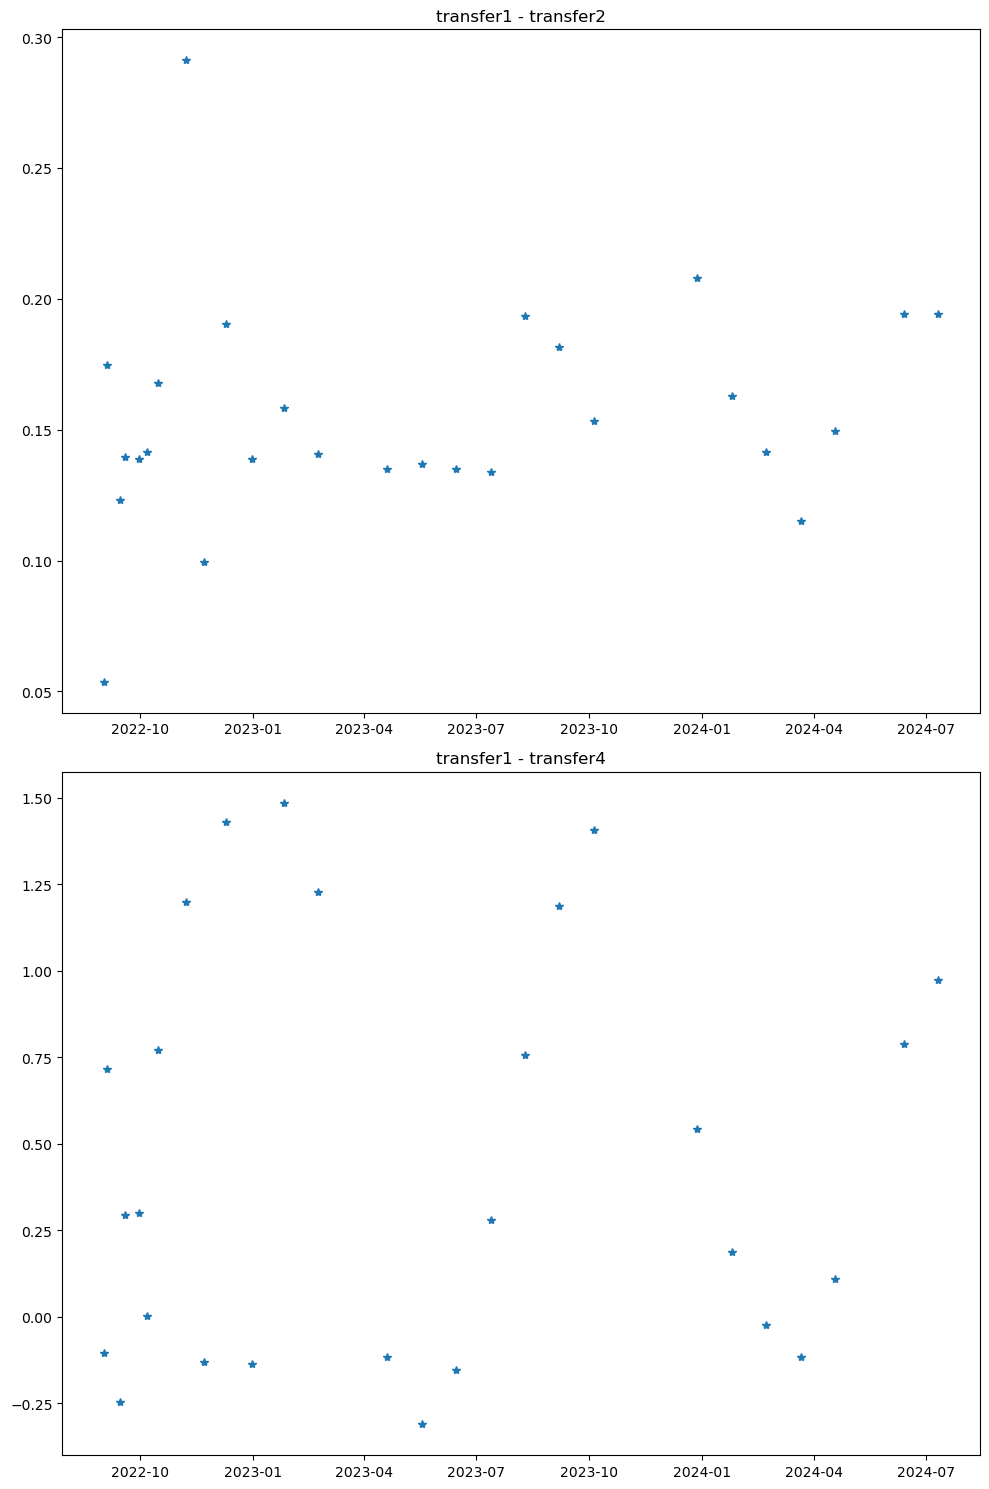

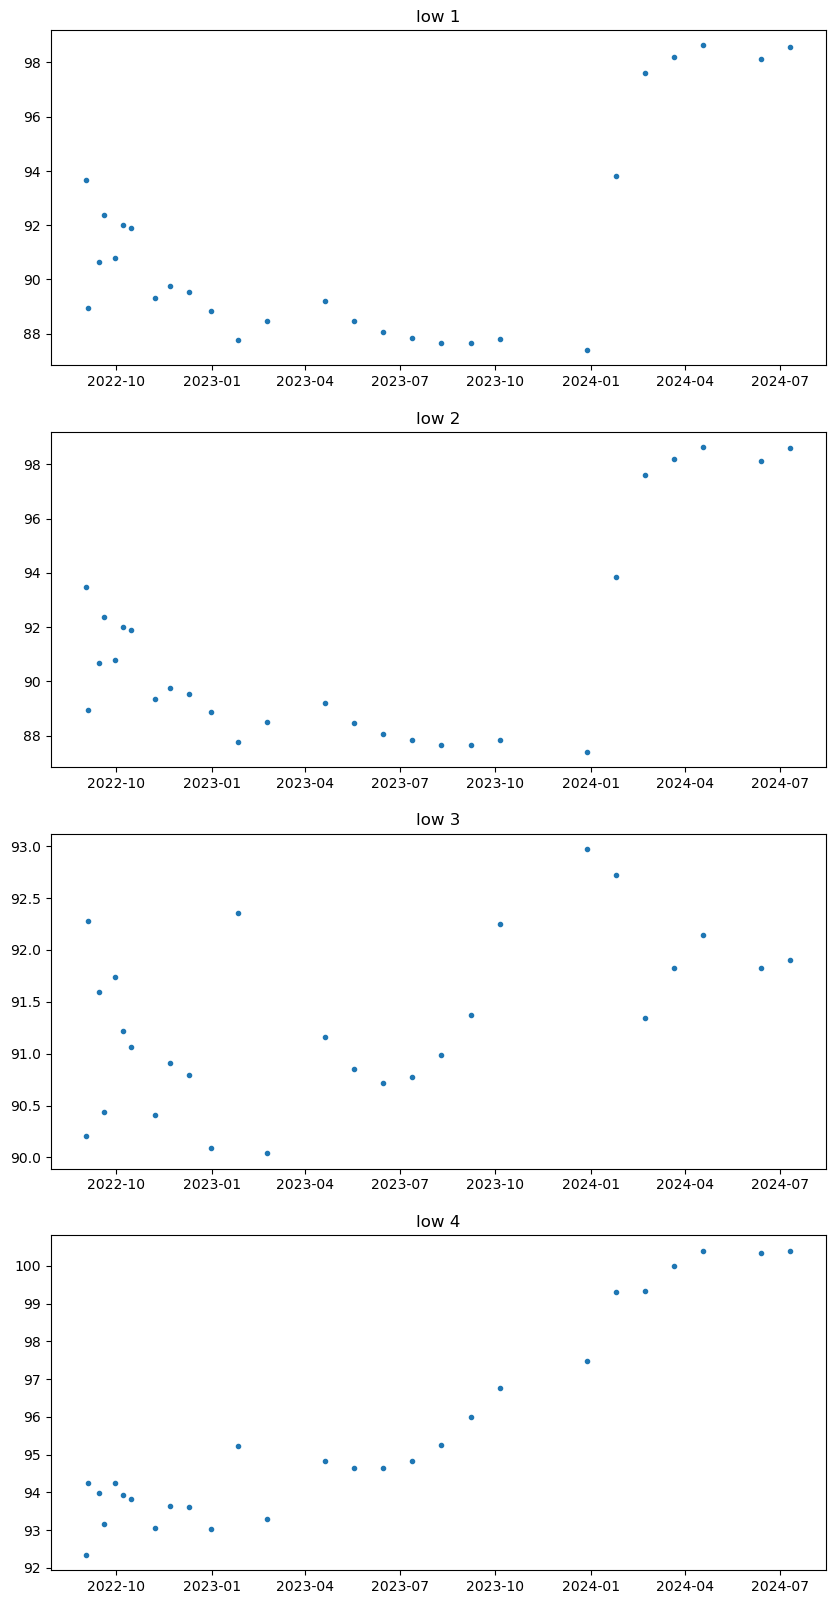

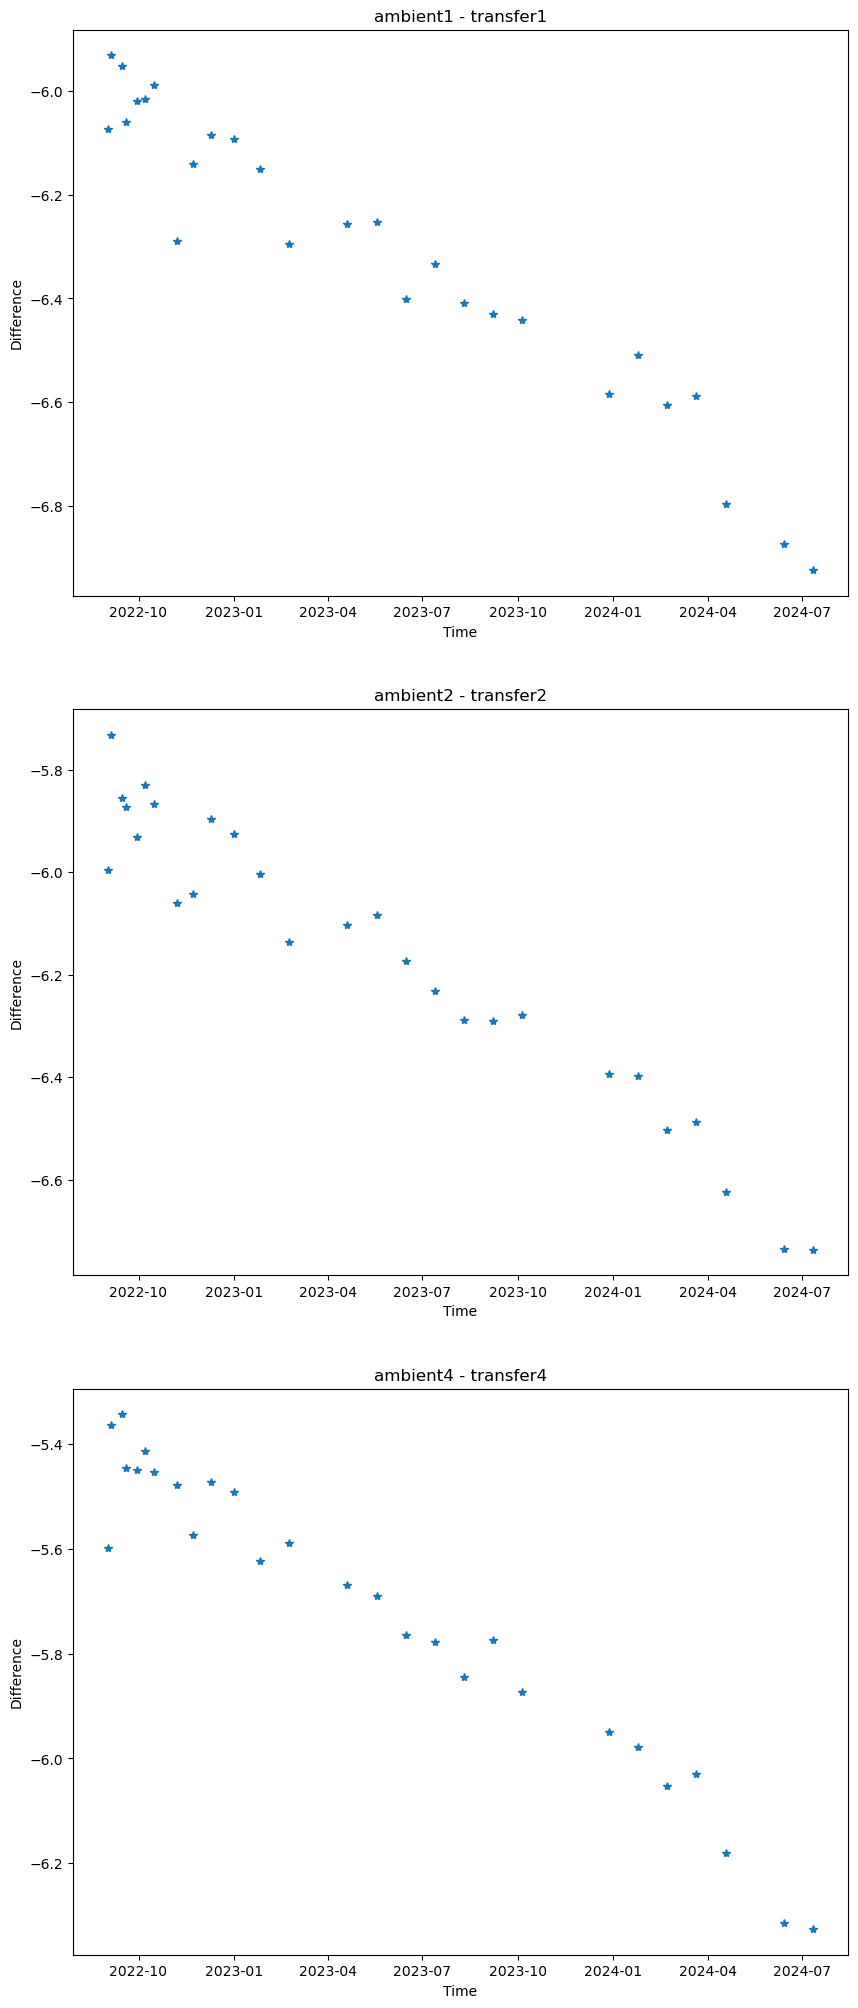

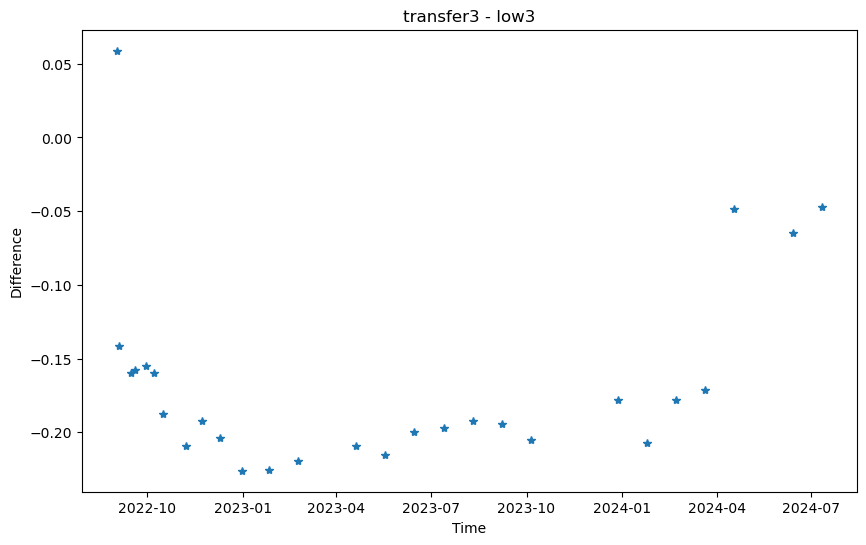

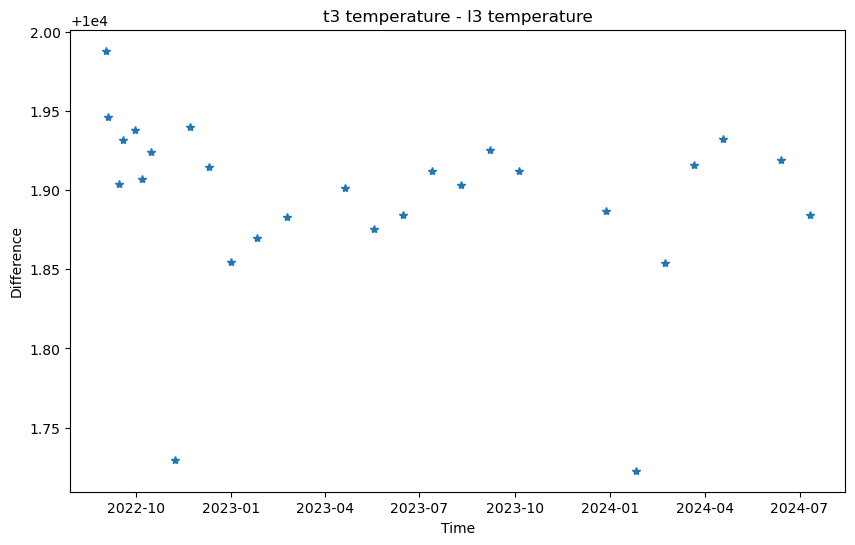

In [85]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame
# Ensure df is loaded and contains the necessary columns: 'response', 'ambient_sensor_pressure', 'transfer_sensor_pressure', 'low_pressure_sensor_pressure', and 'time'

# Extract values based on the 'response' column
a1 = df[df['response'] == 1]['ambient_sensor_pressure'].values
a2 = df[df['response'] == 2]['ambient_sensor_pressure'].values
a3 = df[df['response'] == 3]['ambient_sensor_pressure'].values
a4 = df[df['response'] == 4]['ambient_sensor_pressure'].values
a5 = df[df['response'] == 5]['ambient_sensor_pressure'].values

t1 = df[df['response'] == 1]['transfer_sensor_pressure'].values
t2 = df[df['response'] == 2]['transfer_sensor_pressure'].values
t3 = df[df['response'] == 3]['transfer_sensor_pressure'].values
t4 = df[df['response'] == 4]['transfer_sensor_pressure'].values
t5 = df[df['response'] == 5]['transfer_sensor_pressure'].values

l1 = df[df['response'] == 1]['low_pressure_sensor_pressure'].values
l2 = df[df['response'] == 2]['low_pressure_sensor_pressure'].values
l3 = df[df['response'] == 3]['low_pressure_sensor_pressure'].values
l4 = df[df['response'] == 4]['low_pressure_sensor_pressure'].values
l5 = df[df['response'] == 5]['low_pressure_sensor_pressure'].values

t3temp = df[df['response'] == 3]['transfer_sensor_temperature'].values
l3temp = df[df['response'] == 3]['low_pressure_sensor_temperature'].values

tm = df[df['response'] == 1]['time'].values

# Create subplots for ambient sensor pressures
fig, axs = plt.subplots(3, 1, figsize=(10, 20)) #change to 4 when response 5 is fixed
axs[0].plot(tm, a1 - a2, '.')
axs[0].set_title('ambient1 - ambient2')

axs[1].plot(tm, a1 - a3, '.')
axs[1].set_title('ambient1 - ambient3')

axs[2].plot(tm, a1 - a4, '.')
axs[2].set_title('ambient1 - ambient4')

#axs[3].plot(tm, a1 - a5, '.')
#axs[3].set_title('ambient1 - ambient5')

fig.tight_layout()
plt.show()

# Create subplots for transfer sensor pressures  #change to 3 when response 5 is fixed
fig, axs = plt.subplots(2, 1, figsize=(10, 15))  
axs[0].plot(tm, t1 - t2, '*')
axs[0].set_title('transfer1 - transfer2')

axs[1].plot(tm, t1 - t4, '*')
axs[1].set_title('transfer1 - transfer4')

#axs[2].plot(tm, t1 - t5, '*')
#axs[2].set_title('transfer1 - transfer5')

fig.tight_layout()
plt.show()

# Create subplots for low pressure sensor pressures 
fig, axs = plt.subplots(4, 1, figsize=(10, 20))  #change to 5 when response 5 is fixed
axs[0].plot(tm, l1, '.')
axs[0].set_title('low 1')

axs[1].plot(tm, l2, '.')
axs[1].set_title('low 2')

axs[2].plot(tm, l3, '.')
axs[2].set_title('low 3')

axs[3].plot(tm, l4, '.')
axs[3].set_title('low 4')

#axs[3].plot(tm, l5, '.')
#axs[3].set_title('low 5')


# Create subplots for the differences
fig, axs = plt.subplots(3, 1, figsize=(10, 25)) #change to 4 when response 5 is fixed

# Plot differences
axs[0].plot(tm, a1 - t1, '*')
axs[0].set_title('ambient1 - transfer1')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Difference')

axs[1].plot(tm, a2 - t2, '*')
axs[1].set_title('ambient2 - transfer2')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Difference')


axs[2].plot(tm, a4 - t4, '*')
axs[2].set_title('ambient4 - transfer4')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('Difference')

#axs[3].plot(tm, a5 - t5, '*')
#axs[3].set_title('ambient5 - transfer5')
#axs[3].set_xlabel('Time')
#axs[3].set_ylabel('Difference')

# Create the plot for the difference t3 - l3
plt.figure(figsize=(10, 6))
plt.plot(tm, t3 - l3, '*')
plt.title('transfer3 - low3')
plt.xlabel('Time')
plt.ylabel('Difference')
plt.show()



plt.figure(figsize=(10, 6))
plt.plot(tm, t3temp - l3temp, '*')
plt.title('t3 temperature - l3 temperature')
plt.xlabel('Time')
plt.ylabel('Difference')
plt.show()

fig.tight_layout()
plt.show()


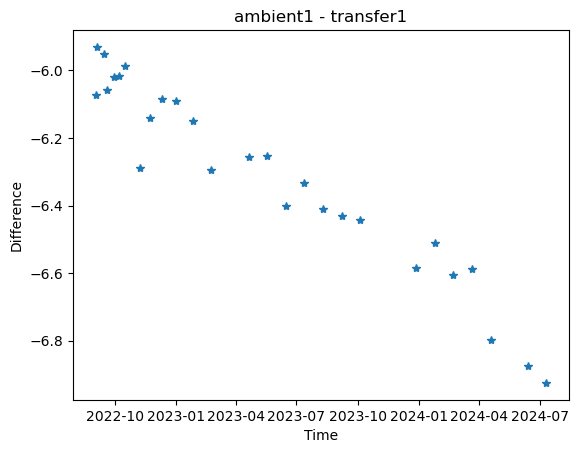

In [95]:
# Plot the difference
#plt.figure(figsize=(10, 8))
plt.plot(tm, a1 - t1, '*')
plt.title('ambient1 - transfer1')
plt.xlabel('Time')
plt.ylabel('Difference')
plt.savefig('AmbientMinusTransfer.png', format='png')
plt.show()

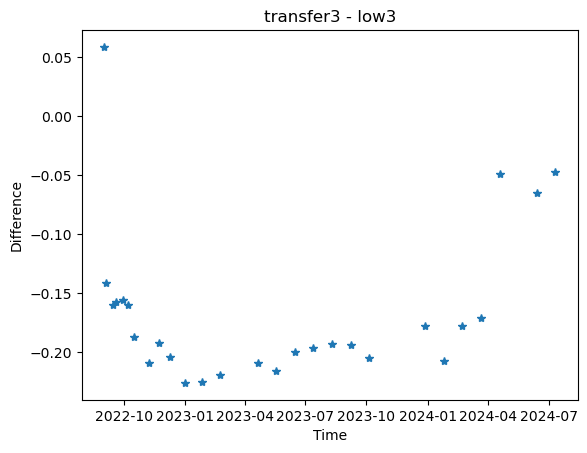

In [97]:
# Create the plot for the difference t3 - l3
plt.plot(tm, t3 - l3, '*')
plt.title('transfer3 - low3')
plt.xlabel('Time')
plt.ylabel('Difference')
plt.savefig('TransferMinusAmbient.png', format='png')
plt.show()

In [87]:
df['ambient_sensor_pressure']

0      15523.4658
1      15530.2559
2      15519.1689
3      15522.8877
4      15531.4893
          ...    
130    15509.0684
131    15516.0410
132    15521.8184
133    15523.5967
134    15518.8564
Name: ambient_sensor_pressure, Length: 135, dtype: float64

In [386]:
df.columns

Index(['response', 'time', 'transfer_sensor_pressure',
       'transfer_sensor_temperature', 'ambient_sensor_pressure',
       'ambient_sensor_temperature', 'low_pressure_sensor_pressure',
       'low_pressure_sensor_temperature', 'response_timestamp'],
      dtype='object')

In [387]:
time

CPU times: user 2 μs, sys: 0 ns, total: 2 μs
Wall time: 6.91 μs


In [420]:
tm

array(['2022-09-01T20:41:56.000000000', '2022-09-04T01:25:13.000000000',
       '2022-09-14T19:04:54.000000000', '2022-09-18T22:36:52.000000000',
       '2022-09-29T21:22:51.000000000', '2022-10-07T01:22:35.000000000',
       '2022-10-15T15:45:53.000000000', '2022-11-07T08:38:36.000000000',
       '2022-11-22T05:16:54.000000000', '2022-12-10T01:15:28.000000000',
       '2022-12-31T10:49:39.000000000', '2023-01-26T03:06:10.000000000',
       '2023-02-23T03:06:30.000000000', '2023-04-20T03:06:10.000000000',
       '2023-05-18T03:06:10.000000000', '2023-06-15T03:06:10.000000000',
       '2023-07-13T03:06:10.000000000', '2023-08-10T03:06:10.000000000',
       '2023-09-07T03:06:10.000000000', '2023-10-05T03:06:10.000000000',
       '2023-12-28T03:06:10.000000000', '2024-01-25T03:06:10.000000000',
       '2024-02-22T03:06:10.000000000', '2024-03-21T03:06:10.000000000',
       '2024-04-18T03:06:10.000000000', '2024-06-13T03:06:17.000000000',
       '2024-07-11T03:06:16.000000000'], dtype='dat

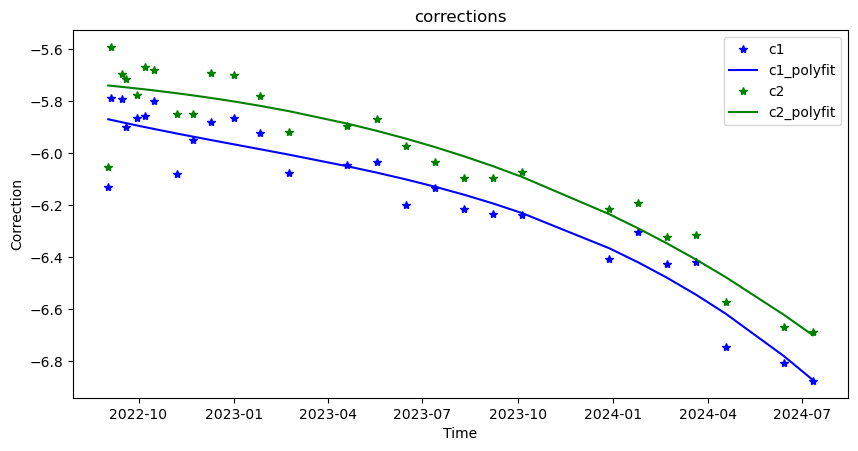

In [388]:
# Check lengths to ensure they match


# Compute the differences
lt3dif = l3 - t3

c1 = a1 - t1 + lt3dif

c2 = a2 - t2 + lt3dif

c4 = a4-t5 + lt3dif

c5 = a5-t5 + lt3dif

# Fit a polynomial to (tm1, c1)
degree = 3  # You can change the degree of the polynomial
tm_numeric = (tm - tm[0]).astype('timedelta64[s]').astype(float)
coeffsc1 = np.polyfit(tm_numeric, c1, degree)
poly_fit = np.polyval(coeffsc1, tm_numeric)
coeffsc2 = np.polyfit(tm_numeric, c2, degree)
c2poly_fit = np.polyval(coeffsc2, tm_numeric)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(tm, c1, 'b*')  # Ensure tm is used for plotting against c1
plt.plot(tm, poly_fit, 'b-', label=f'Polynomial fit (degree {degree})')
plt.plot(tm, c2, 'g*')  # Ensure tm is used for plotting against c2
plt.plot(tm, c2poly_fit, 'g-', label=f'Polynomial fit (degree {degree})')
#plt.plot(tm, c4, '*')  # Ensure tm is used for plotting against c4
#plt.plot(tm, c5, '*')  # Ensure tm is used for plotting against c5
plt.title('corrections')
plt.xlabel('Time')
plt.ylabel('Correction')
#plt.ylim([5, 8])
plt.legend(['c1','c1_polyfit','c2','c2_polyfit','c4','c5'])
plt.gca().set_aspect(250, adjustable='box')
plt.show()




In [393]:
tm

array(['2022-09-01T20:41:56.000000000', '2022-09-04T01:25:13.000000000',
       '2022-09-14T19:04:54.000000000', '2022-09-18T22:36:52.000000000',
       '2022-09-29T21:22:51.000000000', '2022-10-07T01:22:35.000000000',
       '2022-10-15T15:45:53.000000000', '2022-11-07T08:38:36.000000000',
       '2022-11-22T05:16:54.000000000', '2022-12-10T01:15:28.000000000',
       '2022-12-31T10:49:39.000000000', '2023-01-26T03:06:10.000000000',
       '2023-02-23T03:06:30.000000000', '2023-04-20T03:06:10.000000000',
       '2023-05-18T03:06:10.000000000', '2023-06-15T03:06:10.000000000',
       '2023-07-13T03:06:10.000000000', '2023-08-10T03:06:10.000000000',
       '2023-09-07T03:06:10.000000000', '2023-10-05T03:06:10.000000000',
       '2023-12-28T03:06:10.000000000', '2024-01-25T03:06:10.000000000',
       '2024-02-22T03:06:10.000000000', '2024-03-21T03:06:10.000000000',
       '2024-04-18T03:06:10.000000000', '2024-06-13T03:06:17.000000000',
       '2024-07-11T03:06:16.000000000'], dtype='dat

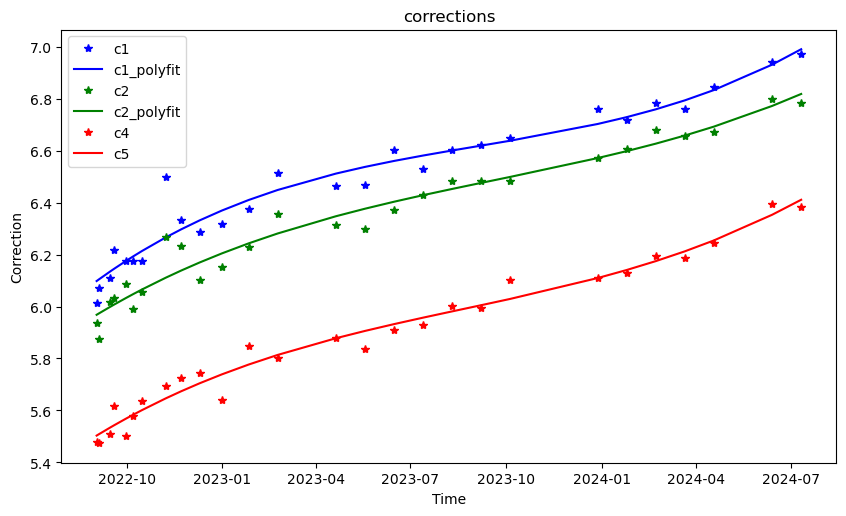

In [418]:
# Check lengths to ensure they match


# Compute the differences
lt3dif = l3 - t3

c1 = t1 - a1 + lt3dif

c2 = t2 - a2 + lt3dif

c4 = t4-a5 + lt3dif

c5 = t5-a5 + lt3dif

# Fit a polynomial to (tm1, c1)
degree = 3  # You can change the degree of the polynomial
tm_numeric = (tm - tm[0]).astype('timedelta64[s]').astype(float)
coeffsc1 = np.polyfit(tm_numeric, c1, degree)
poly_fit = np.polyval(coeffsc1, tm_numeric)
coeffsc2 = np.polyfit(tm_numeric, c2, degree)
c2poly_fit = np.polyval(coeffsc2, tm_numeric)
coeffsc4 = np.polyfit(tm_numeric, c4, degree)
c4poly_fit = np.polyval(coeffsc4, tm_numeric)
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(tm, c1, 'b*')  # Ensure tm is used for plotting against c1
plt.plot(tm, poly_fit, 'b-', label=f'Polynomial fit (degree {degree})')
plt.plot(tm, c2, 'g*')  # Ensure tm is used for plotting against c2
plt.plot(tm, c2poly_fit, 'g-', label=f'Polynomial fit (degree {degree})')
plt.plot(tm, c4, 'r*')  # Ensure tm is used for plotting against c4
plt.plot(tm, c4poly_fit, 'r-', label=f'Polynomial fit (degree {degree})')
#plt.plot(tm, c5, '*')  # Ensure tm is used for plotting against c5
plt.title('corrections')
plt.xlabel('Time')
plt.ylabel('Correction')
#plt.ylim([5, 8])
plt.legend(['c1','c1_polyfit','c2','c2_polyfit','c4','c5'])
plt.gca().set_aspect(250, adjustable='box')
plt.show()




In [398]:
tm_numeric[1]

189797.0

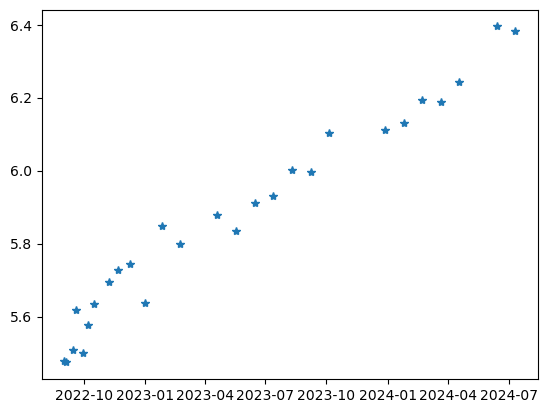

In [400]:
plt.plot(tm, c4, '*')

<function matplotlib.pyplot.show(close=None, block=None)>

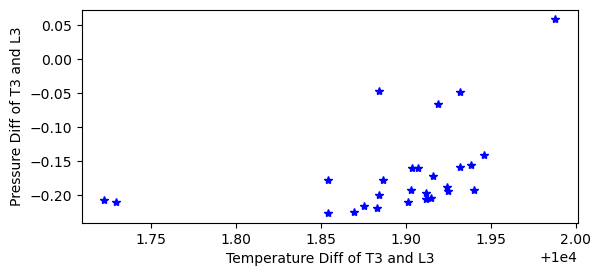

In [402]:

plt.plot( t3temp-l3temp, t3-l3, 'b*')
plt.xlabel('Temperature Diff of T3 and L3')
plt.ylabel('Pressure Diff of T3 and L3')
#plt.ylim([-.3,-0.1])
#plt.xlim([1.8+1e4,1.98+1e4])
plt.gca().set_aspect(.4)
plt.show

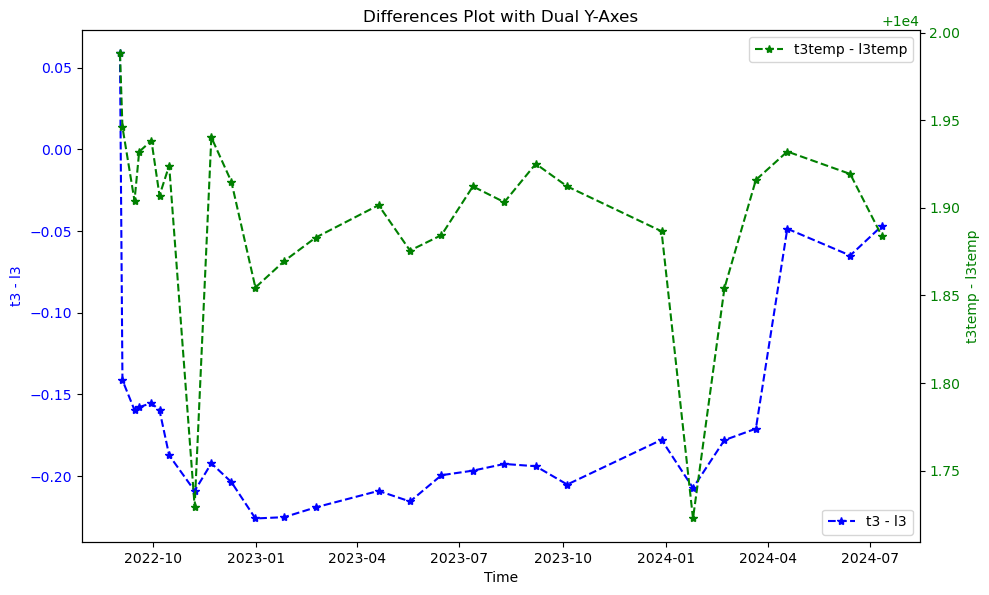

In [404]:
# Compute the differences
t3_l3_diff = t3 - l3
t3temp_l3temp_diff = t3temp - l3temp
# Create a figure and primary axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot on the primary y-axis
ax1.plot(tm, t3_l3_diff, 'b--*', label='t3 - l3')
ax1.set_xlabel('Time')
ax1.set_ylabel('t3 - l3', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='lower right')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot on the secondary y-axis
ax2.plot(tm, t3temp_l3temp_diff, 'g--*', label='t3temp - l3temp')
ax2.set_ylabel('t3temp - l3temp', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='upper right')

# Adjust layout
fig.tight_layout()

plt.title('Differences Plot with Dual Y-Axes')

plt.show()